<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
# note this is the first of two datasets we will use
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
# note that this is loading a second of two datasets that we will use
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [8]:
# list the columns names in alphabetical order
X.columns.sort_values()

Index(['Block', 'FlightNumber', 'Flights', 'GridFins_False', 'GridFins_True',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'Legs_False',
       'Legs_True', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO',
       'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO',
       'Orbit_SSO', 'Orbit_VLEO', 'PayloadMass', 'ReusedCount', 'Reused_False',
       'Reused_True', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007',
       'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006',
       'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011',
       'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016',
       'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020',
       'Serial_

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [9]:
# creata a numpy array from the column 'Class' in data, by applying the method to_numpy() and then assign it to the variable y, while making sure the output is a pandas series, with only one bracket[df'name of column']
y = data['Class'].to_numpy()
y = pd.Series(y)
print(y)


0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Length: 90, dtype: int64


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:
# standarize the data in X, and then reassign it to the variable X using the transform method from the preprocessing module
X = preprocessing.StandardScaler().fit(X).transform(X)
transform = preprocessing.StandardScaler()


array([[-1.71291154e+00, -5.29526321e-17, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [ ]:
# Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2) 
# added a stratify parameter to ensure that the split is stratified, meaning that the proportion of each class in the target variable is maintained in both the training and test sets. 
# This is important for imbalanced datasets, where one class may be significantly more frequent than the other. By using stratified sampling, we can ensure that both the training and test sets have a similar distribution of classes, 
# # which can help improve the performance of the models

we can see we only have 18 test samples.


In [12]:
y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


tuned hyperparameters : (best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.85
0.8333333333333334


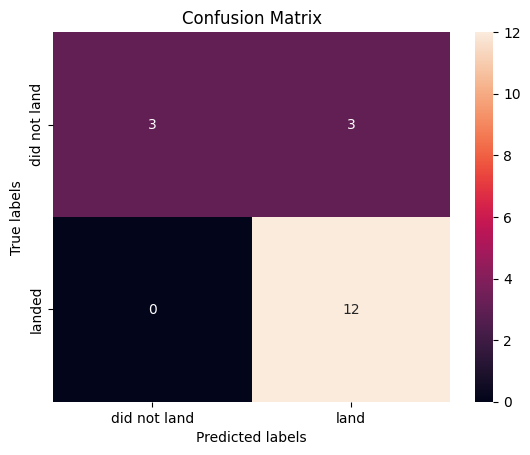

In [13]:
# Create a logistic regression oject; then create a GridSearchCV object logrev_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.
logreg = LogisticRegression(max_iter=1000)
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
logrev_cv = GridSearchCV(logreg, parameters, cv=10)
logrev_cv.fit(X_train, y_train)
y_predict = logrev_cv.predict(X_test)
print("tuned hyperparameters : (best parameters) ", logrev_cv.best_params_)
print("accuracy :", logrev_cv.best_score_)
print(logrev_cv.score(X_test, y_test))
plot_confusion_matrix(y_test, y_predict)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [14]:
# We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params and the accuracy on the validation data using the data attribute best_score_
# see above


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
# Calculate the accuracy on the test data using the method score
# see code above


# Logistic regression = accuracy : 0.85


Lets look at the confusion matrix:


In [ ]:
# yhat=logreg_cv.predict(X_test)
# plot_confusion_matrix(Y_test,yhat)

# see code above

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


tuned hyperparameters : (best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8642857142857144
0.8333333333333334


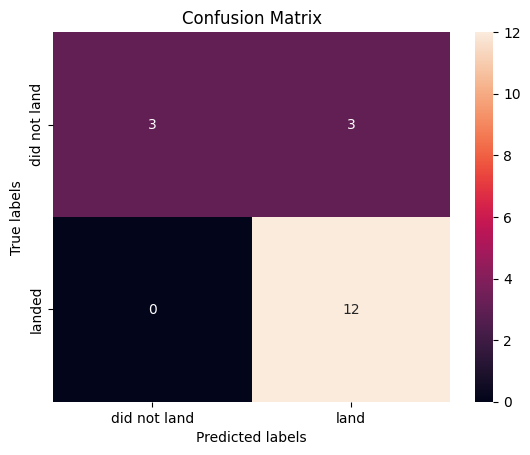

In [17]:
# Create a support vector machine object;  then  create a GridSearchCV object svm_cv with cv = 10.  Fit the object to find the best parameters from the dictionary parameters.
svm = SVC()
parameters = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf','poly','rbf', 'sigmoid'], 'C': np.logspace(-3, 3, 5), 'gamma':np.logspace(-3, 3, 5)}
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, y_train)
y_predict = svm_cv.predict(X_test)
print("tuned hyperparameters : (best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)
print(svm_cv.score(X_test, y_test))
plot_confusion_matrix(y_test, y_predict)

In [ ]:
# parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
 #              'C': np.logspace(-3, 3, 5),
 #             'gamma':np.logspace(-3, 3, 5)}
# svm = SVC()

# see code above

In [ ]:
# print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
# print("accuracy :",svm_cv.best_score_)

# see code above

## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
# see code above

# SVM accuray = accuracy : 0.8642857142857144

We can plot the confusion matrix


In [21]:
# yhat=svm_cv.predict(X_test)
# plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


tuned hyperparameters : (best parameters)  {'criterion': 'gini', 'max_depth': 2}
accuracy : 0.8482142857142858
0.7777777777777778


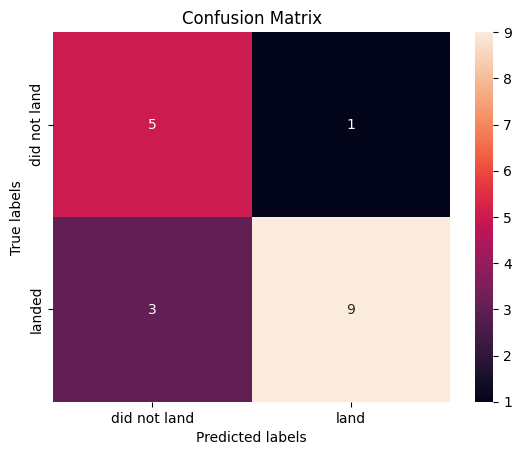

In [22]:
# Create a decision tree classifier object; then create a GridSearchCV object tree_cv with cv = 10.  Fit the object to find the best parameters from the dictionary parameters
tree = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5]}
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, y_train)
y_predict = tree_cv.predict(X_test)
print("tuned hyperparameters : (best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)
print(tree_cv.score(X_test, y_test))
plot_confusion_matrix(y_test, y_predict)

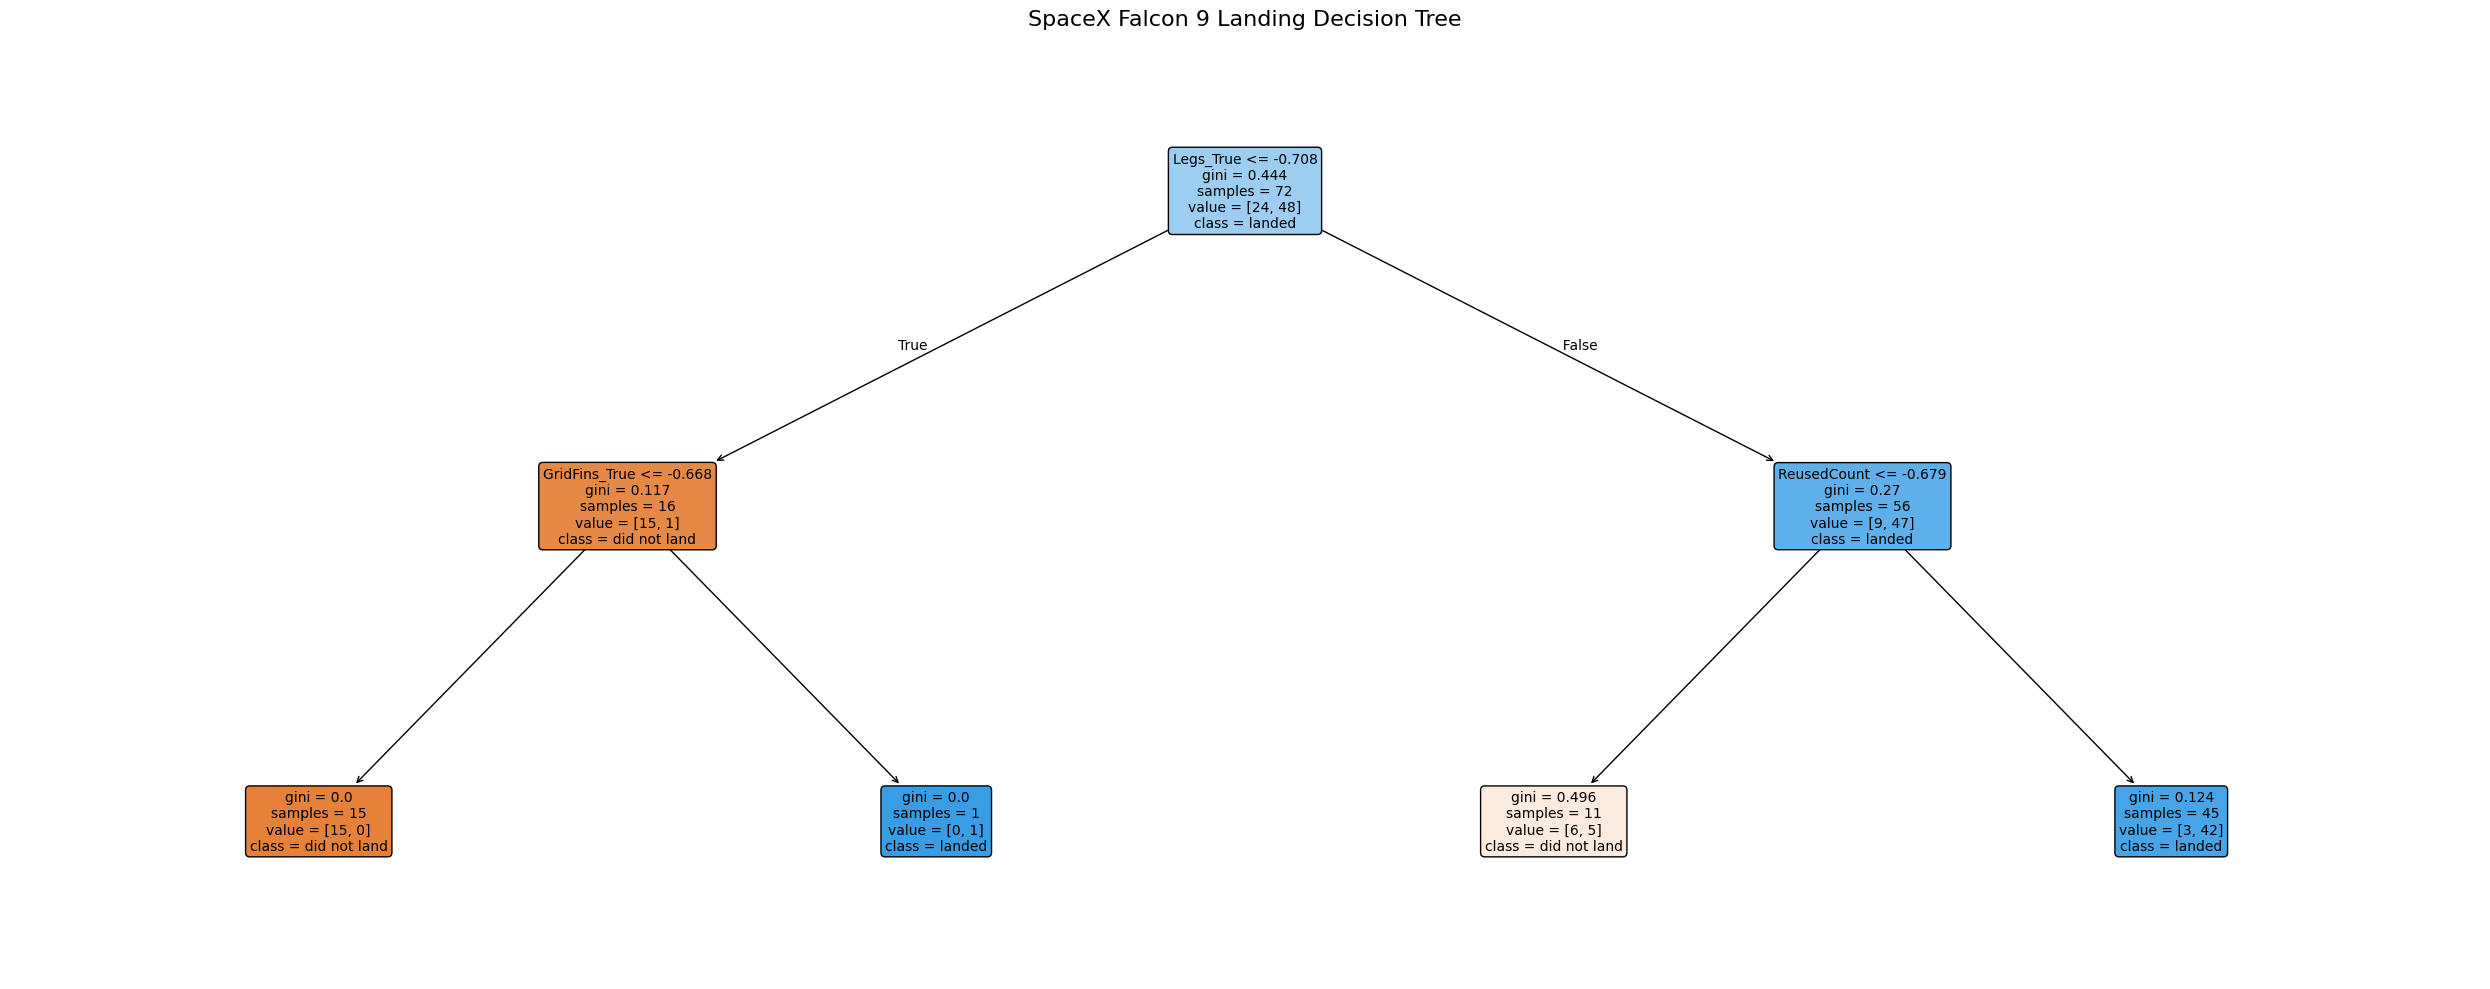

Top 10 features by importance:
Legs_True        0.7170
ReusedCount      0.1935
GridFins_True    0.0895
dtype: float64


In [50]:
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

# Get the best decision tree model
best_tree = tree_cv.best_estimator_

# Get the original feature names by reading the dataset again
feature_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
feature_names = feature_df.columns.tolist()

# Plot decision tree with feature names
plt.figure(figsize=(25, 10))
tree.plot_tree(
    best_tree,
    feature_names=feature_names,
    class_names=['did not land', 'landed'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("SpaceX Falcon 9 Landing Decision Tree", fontsize=16)
plt.tight_layout()
plt.show()

# Print feature importances
importances = pd.Series(best_tree.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)
print("Top 10 features by importance:")
print(importances[importances > 0].head(10).round(4))


In [23]:
# parameters = {'criterion': ['gini', 'entropy'],
#      'splitter': ['best', 'random'],
#      'max_depth': [2*n for n in range(1,10)],
#      'max_features': ['auto', 'sqrt'],
#      'min_samples_leaf': [1, 2, 4],
#      'min_samples_split': [2, 5, 10]}

# tree = DecisionTreeClassifier()

In [24]:
# print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
# print("accuracy :",tree_cv.best_score_)

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
# see above

# Decision Tree accuracy : 0.8482142857142858

We can plot the confusion matrix


In [26]:
# yhat = tree_cv.predict(X_test)
# plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


tuned hyperparameters : (best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.8642857142857142
0.7777777777777778


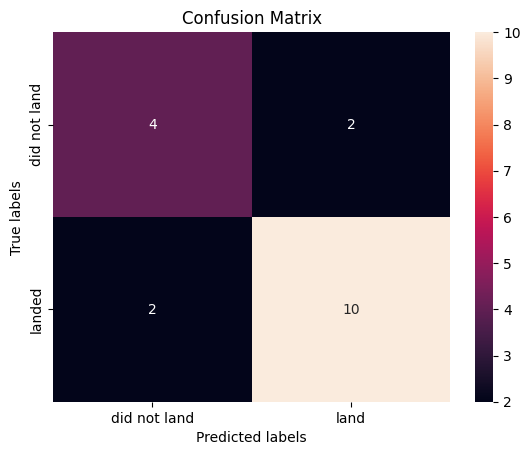

In [27]:
# Create a K nearest neighbors classifier object; then create a GridSearchCV object knn_cv with cv = 10.  Fit the object to find the best parameters from the dictionary parameters
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2],}
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, y_train)
y_predict = knn_cv.predict(X_test)
print("tuned hyperparameters : (best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)
print(knn_cv.score(X_test, y_test))
plot_confusion_matrix(y_test, y_predict)

In [ ]:
# parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#              'p': [1,2]}

# KNN = KNeighborsClassifier()

# see code above

In [ ]:
# print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
# print("accuracy :",knn_cv.best_score_)

# see code above

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [ ]:
# see above

# KNN accuracy: 0.8642857142857142

We can plot the confusion matrix


In [ ]:
# see above

# yhat = knn_cv.predict(X_test)
# plot_confusion_matrix(Y_test,yhat)

# see code above

## TASK  12


Find the method performs best:


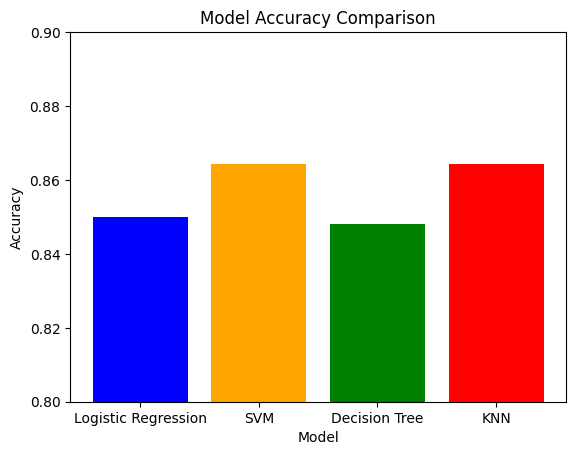

In [ ]:
# Create bar charts to compare the accuracy of the models
labels = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [0.85, 0.8642857142857144, 0.8482142857142858, 0.8642857142857142]

# Create a bar chart
bars = plt.bar(labels, accuracy, color=['blue', 'orange', 'green', 'red'])

# Add title and axis labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.9)  # Set y-axis range for better visualization

# Show the chart
plt.show()

# The most accurate model is the SVM model with an accuracy of 0.8642857142857144
# followed by KNN with an accuracy of 0.8642857142857142. Essentially, this is a tie, in terms of accuracy.

# When we take into account the confusion matrixes, we see that XXXXX


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
